In [20]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()

In [ ]:
%matplotlib inline
# %matplotlib notebook

In [2]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2017, 1, 1)

stock = web.DataReader("BTC-USD", 'yahoo')

In [3]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-20,235.268997,224.300995,224.619995,235.268997,24978000.0,235.268997
2015-04-21,237.908997,233.475998,235.602005,234.175995,23847900.0,234.175995
2015-04-22,236.475006,233.199005,234.052994,236.462006,17036000.0,236.462006
2015-04-23,236.304993,229.932999,235.970001,231.268005,21448700.0,231.268005
2015-04-24,232.561005,226.337006,231.235001,226.389999,13957200.0,226.389999


## Moving Average

In [12]:
stock['MA21'] = stock['Adj Close'].rolling(window=21).mean()

In [13]:
stock['MA50'] = stock['Adj Close'].rolling(window=50).mean()

In [14]:
stock['MA200'] = stock['Adj Close'].rolling(window=200).mean()

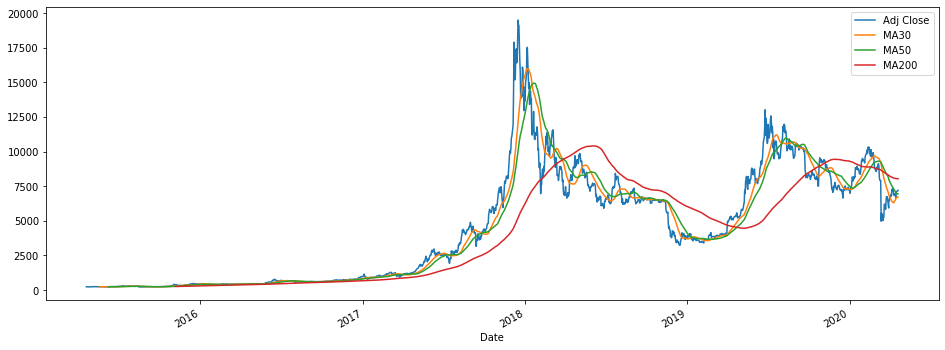

In [15]:
stock[['Adj Close','MA21','MA50','MA200']].plot(figsize=(16,6))

### Ultimi 50 giorni

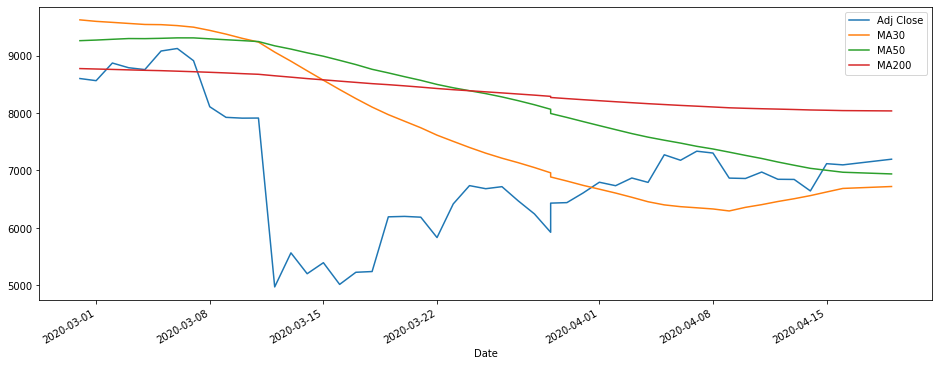

In [16]:
stock[['Adj Close','MA30','MA50','MA200']].tail(50).plot(figsize=(16,6))

## Ritorno sull'investimento

In [17]:
stock['returns'] = stock['Adj Close'].pct_change(1)

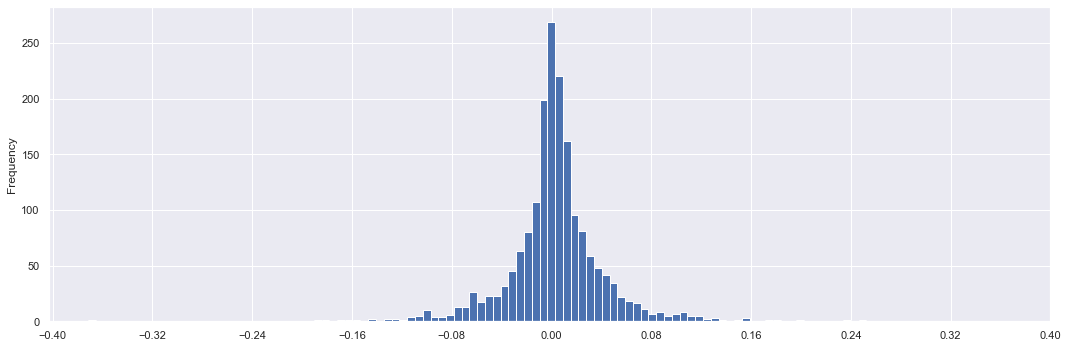

In [55]:
stock['returns'].plot(kind='hist', bins=100, figsize=(15,5))
plt.xticks(np.linspace(-0.4,0.4,11));
plt.tight_layout()

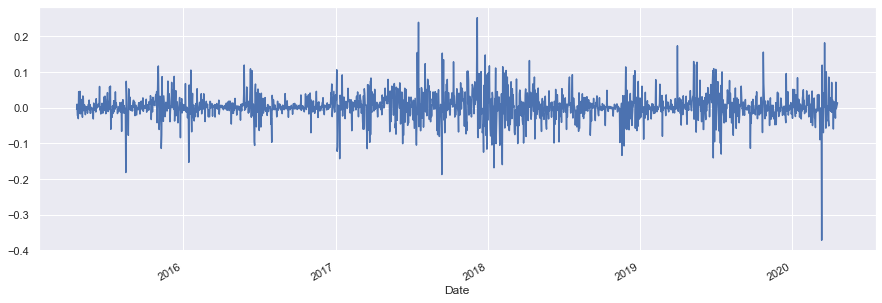

In [51]:
stock['returns'].plot(figsize=(15,5))

In [40]:
pd.DataFrame(stock['returns'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
returns,1824.0,0.002658,0.039278,-0.371695,-0.011424,0.001937,0.017331,0.252472


## EWMA

## Bollinger

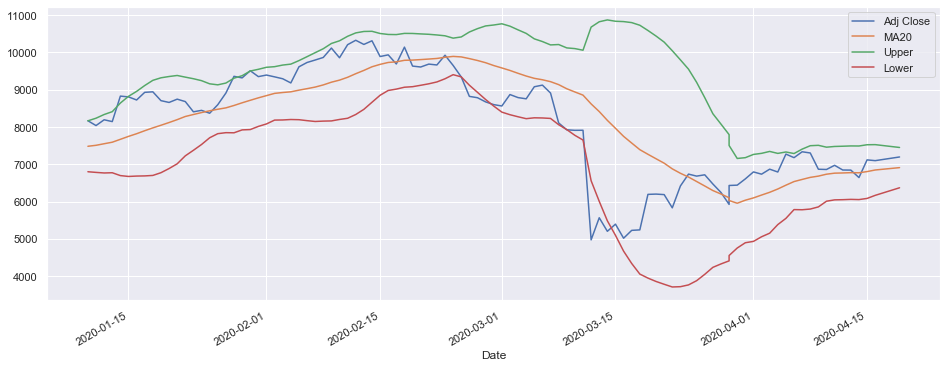

In [58]:
# Close 20 MA
stock['MA20'] = stock['Adj Close'].rolling(window=20).mean()

# Upper = 20MA + 2*std(20)
stock['Upper'] = stock['MA20'] + 2*stock['Adj Close'].rolling(window=20).std()

# Lower = 20MA - 2*std(20)
stock['Lower'] = stock['MA20'] - 2*stock['Adj Close'].rolling(window=20).std()

# Close
stock[['Adj Close','MA20','Upper','Lower']].tail(100).plot(figsize=(16,6))